In [2]:
#importing libraries
import numpy as np 
import pandas as pd
import random as rd

#data visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px
from PIL import Image

#for the CNN model
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing
from keras.preprocessing.image import ImageDataGenerator

#setting seed for reproducability
from numpy.random import seed
seed(10)
tf.random.set_seed(20)


In [3]:
data_dir = './sign_lang_ds/'

#for viewing filenames
import os
for dirname, _, filenames in os.walk(data_dir):
    for filename in filenames:
        print(os.path.join(dirname, filename))

./sign_lang_ds/american_sign_language.PNG
./sign_lang_ds/amer_sign2.png
./sign_lang_ds/amer_sign3.png
./sign_lang_ds/sign_mnist_test.csv
./sign_lang_ds/sign_mnist_train.csv
./sign_lang_ds/sign_mnist_test\sign_mnist_test.csv
./sign_lang_ds/sign_mnist_train\sign_mnist_train.csv


In [4]:
train_ds_path = data_dir + 'sign_mnist_train.csv'
train_df = pd.read_csv(train_ds_path)

train_df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,...,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,...,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,...,235,234,233,231,230,226,225,222,229,163
4,13,164,167,170,172,176,179,180,184,185,...,92,105,105,108,133,163,157,163,164,179


In [5]:
test_ds_path = data_dir + 'sign_mnist_test.csv'
test_df = pd.read_csv(test_ds_path)

test_df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,6,149,149,150,150,150,151,151,150,151,...,138,148,127,89,82,96,106,112,120,107
1,5,126,128,131,132,133,134,135,135,136,...,47,104,194,183,186,184,184,184,182,180
2,10,85,88,92,96,105,123,135,143,147,...,68,166,242,227,230,227,226,225,224,222
3,0,203,205,207,206,207,209,210,209,210,...,154,248,247,248,253,236,230,240,253,255
4,3,188,191,193,195,199,201,202,203,203,...,26,40,64,48,29,46,49,46,46,53


In [6]:
#summing the number of na in the training dataset
print(sum(train_df.isna().sum()))

#summing the number of na in the test dataset
print(sum(test_df.isna().sum()))

0
0


### Creating Our X and Y values

In [7]:
#Creating X and Y values for the train dataset

X_train = train_df.drop(labels = ['label'], axis=1)

Y_train = train_df['label']

In [8]:
X_train

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,107,118,127,134,139,143,146,150,153,156,...,207,207,207,207,206,206,206,204,203,202
1,155,157,156,156,156,157,156,158,158,157,...,69,149,128,87,94,163,175,103,135,149
2,187,188,188,187,187,186,187,188,187,186,...,202,201,200,199,198,199,198,195,194,195
3,211,211,212,212,211,210,211,210,210,211,...,235,234,233,231,230,226,225,222,229,163
4,164,167,170,172,176,179,180,184,185,186,...,92,105,105,108,133,163,157,163,164,179
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27450,189,189,190,190,192,193,193,193,193,194,...,132,165,99,77,52,200,234,200,222,225
27451,151,154,157,158,160,161,163,164,166,167,...,198,198,198,198,198,196,195,195,195,194
27452,174,174,174,174,174,175,175,174,173,173,...,121,196,209,208,206,204,203,202,200,200
27453,177,181,184,185,187,189,190,191,191,190,...,119,56,27,58,102,79,47,64,87,93


In [9]:
Y_train

0         3
1         6
2         2
3         2
4        13
         ..
27450    13
27451    23
27452    18
27453    17
27454    23
Name: label, Length: 27455, dtype: int64

In [10]:
#Creating X and Y values for the Test dataset

X_test = test_df.drop(labels = ['label'],axis=1)

Y_test = test_df['label']

#### SCALING IMAGES

In [11]:
#Scaling the images to a pixel range between 0 and 1

X_train = X_train/255.0
X_test = X_test/255.0

In [12]:
print(X_train)

         pixel1    pixel2    pixel3    pixel4    pixel5    pixel6    pixel7  \
0      0.419608  0.462745  0.498039  0.525490  0.545098  0.560784  0.572549   
1      0.607843  0.615686  0.611765  0.611765  0.611765  0.615686  0.611765   
2      0.733333  0.737255  0.737255  0.733333  0.733333  0.729412  0.733333   
3      0.827451  0.827451  0.831373  0.831373  0.827451  0.823529  0.827451   
4      0.643137  0.654902  0.666667  0.674510  0.690196  0.701961  0.705882   
...         ...       ...       ...       ...       ...       ...       ...   
27450  0.741176  0.741176  0.745098  0.745098  0.752941  0.756863  0.756863   
27451  0.592157  0.603922  0.615686  0.619608  0.627451  0.631373  0.639216   
27452  0.682353  0.682353  0.682353  0.682353  0.682353  0.686275  0.686275   
27453  0.694118  0.709804  0.721569  0.725490  0.733333  0.741176  0.745098   
27454  0.701961  0.705882  0.705882  0.705882  0.713725  0.709804  0.713725   

         pixel8    pixel9   pixel10  ...  pixel775 

In [13]:
print(X_test)

        pixel1    pixel2    pixel3    pixel4    pixel5    pixel6    pixel7  \
0     0.584314  0.584314  0.588235  0.588235  0.588235  0.592157  0.592157   
1     0.494118  0.501961  0.513725  0.517647  0.521569  0.525490  0.529412   
2     0.333333  0.345098  0.360784  0.376471  0.411765  0.482353  0.529412   
3     0.796078  0.803922  0.811765  0.807843  0.811765  0.819608  0.823529   
4     0.737255  0.749020  0.756863  0.764706  0.780392  0.788235  0.792157   
...        ...       ...       ...       ...       ...       ...       ...   
7167  0.529412  0.466667  0.423529  0.400000  0.411765  0.388235  0.239216   
7168  0.615686  0.623529  0.631373  0.643137  0.650980  0.650980  0.670588   
7169  0.745098  0.749020  0.745098  0.749020  0.745098  0.745098  0.752941   
7170  0.788235  0.803922  0.815686  0.819608  0.839216  0.847059  0.854902   
7171  0.678431  0.682353  0.678431  0.682353  0.678431  0.678431  0.686275   

        pixel8    pixel9   pixel10  ...  pixel775  pixel776  pi

#### RESHAPING THE IMAGES TO A 1X28X28 DIMENSION

In [14]:
X_train = X_train.values.reshape(-1,28,28,1)
X_test = X_test.values.reshape(-1,28,28,1)

In [15]:
print(X_train.shape)
print(X_test.shape)

(27455, 28, 28, 1)
(7172, 28, 28, 1)


### VISUALIZING THE LABELS OF THE DATASET

In [18]:
fig = px.histogram(train_df,
                   x='label',
                   color='label',
                   title='Distribution of Labels in the train dataset',
                   width=700,height=500)
fig.show()

In [20]:
fig = px.histogram(test_df,
                   x='label',
                   color='label',
                   title='Distribution of Labels in the test dataset', 
                   width=700, height=500)
fig.show()

### DISPLAYING THE IMAGES

#### TRAINING DATA

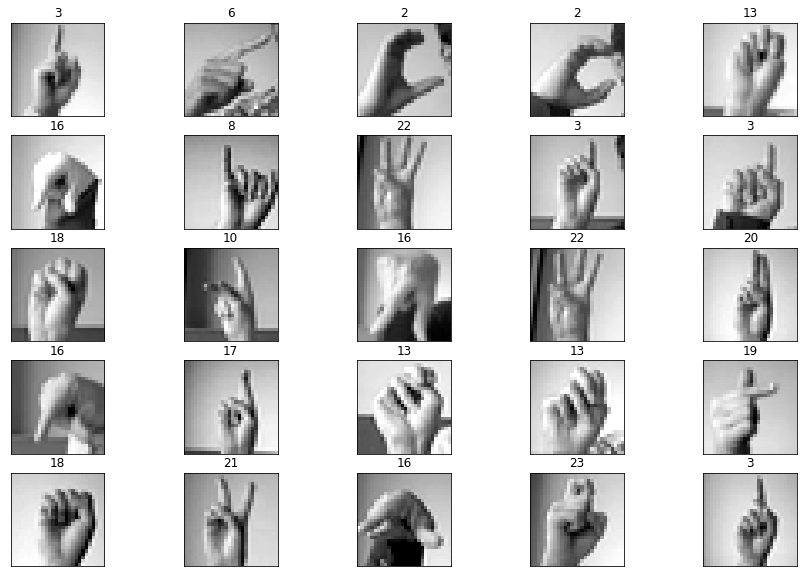

In [26]:
#creating a 5x5 grid of the first 25 photos in the training images
fig, axes = plt.subplots(nrows=5, ncols=5, figsize=(15, 10),
                        subplot_kw={'xticks': [], 'yticks': []})

for i in range(25):
    plt.subplot(5,5,i+1)
    plt.imshow(X_train[i], cmap='gray')
    plt.title(Y_train[i])
plt.show()

In [ ]:
print(X_train)
X_train[1].shape

#### TEST DATA

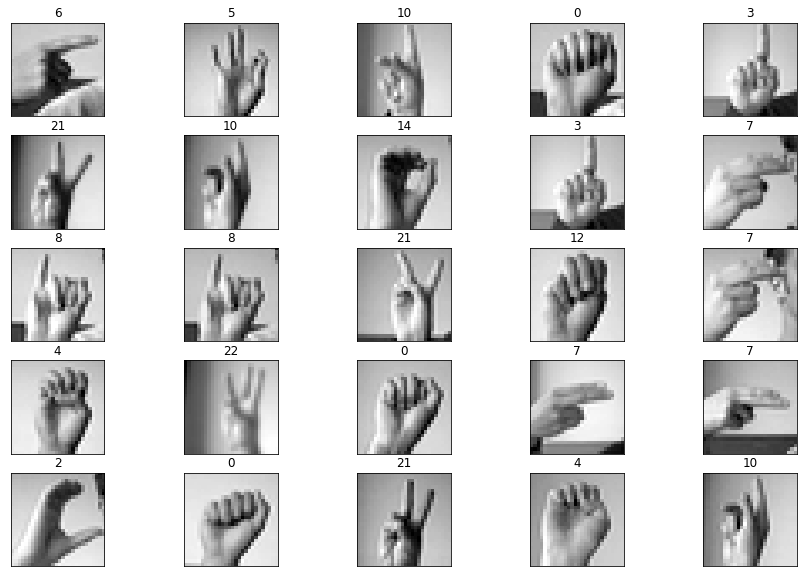

In [33]:
#creating a 5x5 grid of the first 25 photos in the training images
fig, axes = plt.subplots(nrows=5, ncols=5, figsize=(15, 10),
                        subplot_kw={'xticks': [], 'yticks': []})

for i in range(25):
    plt.subplot(5,5,i+1)
    plt.imshow(X_test[i], cmap='gray')
    plt.title(Y_test[i])
plt.show()

### THE CNN MODEL

#### SPLITTING TRAINING DATA TO TRAIN AND VALIDATION SET

In [34]:
X_train, X_val, Y_train, Y_val = train_test_split(
    X_train, Y_train, test_size=0.3, random_state=7)

In [35]:
#showing the shapes of our train, validate, and test images
print(X_train.shape)
print(Y_train.shape)
print(X_val.shape)
print(Y_val.shape)
print(X_test.shape)
print(Y_test.shape)


(19218, 28, 28, 1)
(19218,)
(8237, 28, 28, 1)
(8237,)
(7172, 28, 28, 1)
(7172,)


#### BUILDING THE MODEL

In [38]:
model = keras.Sequential([
    layers.BatchNormalization(),
    layers.Conv2D(filters=32, kernel_size=(5, 5), activation='relu',
                  padding='same', input_shape=[28, 28, 1]),
    layers.MaxPool2D(),
    layers.Dropout(.25),

    layers.BatchNormalization(),
    layers.Conv2D(filters=32, kernel_size=(3, 3),
                  activation="relu", padding='same'),
    layers.MaxPool2D(),
    layers.Dropout(.25),

    layers.BatchNormalization(),
    layers.Conv2D(filters=64, kernel_size=(3, 3),
                  activation="relu", padding='same'),
    layers.MaxPool2D(),
    layers.Dropout(.25),

    layers.BatchNormalization(),
    layers.Conv2D(filters=128, kernel_size=(3, 3),
                  activation="relu", padding='same'),
    layers.MaxPool2D(),
    layers.Dropout(.25),

    layers.Flatten(),
    layers.Dropout(.25),
    layers.Dense(units=64, activation="relu"),
    layers.Dense(units=26, activation="softmax"),
])

In [39]:
#compiling the model
model.compile(
    optimizer=tf.keras.optimizers.Adam(epsilon=0.01),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

### TRAINING THE MODEL

In [40]:
history = model.fit(
    x = X_train,
    y = Y_train,
    validation_data= (X_val,Y_val),
    batch_size = 128,
    epochs=50,
    verbose=2,
)

Epoch 1/50
151/151 - 23s - loss: 3.2485 - accuracy: 0.0719 - val_loss: 3.2917 - val_accuracy: 0.0404 - 23s/epoch - 149ms/step
Epoch 2/50
151/151 - 19s - loss: 2.3982 - accuracy: 0.2461 - val_loss: 2.8740 - val_accuracy: 0.1955 - 19s/epoch - 123ms/step
Epoch 3/50
151/151 - 19s - loss: 1.5050 - accuracy: 0.4796 - val_loss: 1.1640 - val_accuracy: 0.6636 - 19s/epoch - 126ms/step
Epoch 4/50
151/151 - 20s - loss: 0.9864 - accuracy: 0.6507 - val_loss: 0.5213 - val_accuracy: 0.8569 - 20s/epoch - 135ms/step
Epoch 5/50
151/151 - 21s - loss: 0.7004 - accuracy: 0.7493 - val_loss: 0.3019 - val_accuracy: 0.9247 - 21s/epoch - 136ms/step
Epoch 6/50
151/151 - 20s - loss: 0.5281 - accuracy: 0.8145 - val_loss: 0.2129 - val_accuracy: 0.9523 - 20s/epoch - 134ms/step
Epoch 7/50
151/151 - 20s - loss: 0.4126 - accuracy: 0.8548 - val_loss: 0.1292 - val_accuracy: 0.9772 - 20s/epoch - 131ms/step
Epoch 8/50
151/151 - 21s - loss: 0.3329 - accuracy: 0.8857 - val_loss: 0.0865 - val_accuracy: 0.9858 - 21s/epoch - 137

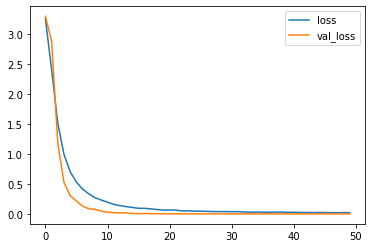

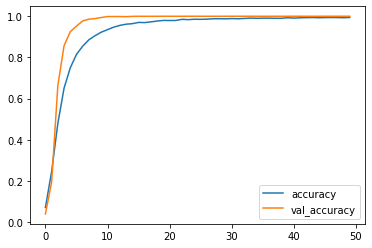

In [41]:
#Viewing the training results
history_frame = pd.DataFrame(history.history)
history_frame.loc[:, ['loss', 'val_loss']].plot()
history_frame.loc[:, ['accuracy', 'val_accuracy']].plot();

In [42]:
#creating our predictions using the test pixel values
predictions = model.predict(X_test)
predictions = np.argmax(predictions,axis = 1)

#creating a report that show how our predictions compare with actual values
print(classification_report(Y_test, predictions))

225/225 [==============================] - 2s 7ms/step
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       331
           1       1.00      1.00      1.00       432
           2       1.00      1.00      1.00       310
           3       1.00      1.00      1.00       245
           4       0.96      1.00      0.98       498
           5       1.00      1.00      1.00       247
           6       1.00      0.97      0.98       348
           7       1.00      1.00      1.00       436
           8       1.00      1.00      1.00       288
          10       1.00      1.00      1.00       331
          11       1.00      1.00      1.00       209
          12       1.00      1.00      1.00       394
          13       1.00      1.00      1.00       291
          14       1.00      1.00      1.00       246
          15       1.00      1.00      1.00       347
          16       1.00      1.00      1.00       164
          17       1.00   